In [1]:
import pandas as pd
import os

In [3]:
SRC_DIR = os.path.abspath(".")         # endereço do script
BASE_DIR = os.path.dirname(SRC_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")

data_file = os.path.join(DATA_DIR, 'train_processed.csv')
titanic_train = pd.read_csv(data_file, index_col=0)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   family_size  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


In [10]:
target_name = 'Survived'
target = titanic_train[target_name]
data = titanic_train.drop(columns='Survived')
data['Pclass'] = data['Pclass'].astype('object')
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,3,male,22.0,1,0,7.2500,S,2
1,1,female,38.0,1,0,71.2833,C,2
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,2
4,3,male,35.0,0,0,8.0500,S,1


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [9]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

imp_num = SimpleImputer(strategy='median')
scaler = StandardScaler()
imp_cat = SimpleImputer(strategy='constant')
onehot = OneHotEncoder(handle_unknown='ignore')

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [27]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [28]:
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
     ('scaler', StandardScaler())])

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')
clf = LogisticRegression()
logit=make_pipeline(preprocessor, clf)
logit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [31]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123)

In [32]:
_ = logit.fit(data_train, target_train)

In [34]:
target_preds = logit.predict(data_test)
logit.score(data_test, target_test)

0.8116591928251121

## Evaluation of the  model with cross validation
***

In [37]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [40]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(logit, data, target, cv=cv, scoring='accuracy')
cv_results

{'fit_time': array([0.05221891, 0.04884911, 0.06687331, 0.05641747, 0.04232526,
        0.04637265, 0.03447866, 0.0350163 , 0.03008413, 0.03428864,
        0.03607202, 0.04204154, 0.04124808, 0.03600955, 0.03966498,
        0.03791404, 0.03564668, 0.03454614, 0.02799582, 0.03516698,
        0.03920412, 0.04394865, 0.04596305, 0.03541708, 0.03630614,
        0.0336771 , 0.03858352, 0.03664923, 0.03427553, 0.03292942]),
 'score_time': array([0.01678538, 0.01795411, 0.01382756, 0.0133419 , 0.0113492 ,
        0.01524115, 0.00805783, 0.00956941, 0.00964737, 0.01435113,
        0.01231074, 0.01466322, 0.01433253, 0.01190186, 0.01329684,
        0.01315331, 0.01043391, 0.01033902, 0.00895405, 0.01106358,
        0.01349735, 0.01726627, 0.01411867, 0.01007414, 0.01336288,
        0.01154733, 0.01184392, 0.01069403, 0.0120883 , 0.01046896]),
 'test_score': array([0.81005587, 0.77653631, 0.81005587, 0.7877095 , 0.82122905,
        0.80446927, 0.81564246, 0.81005587, 0.83240223, 0.83798883,
    

In [41]:
scores = cv_results['test_score']
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.816 +/- 0.024


In [44]:
errors_logit_classifier = pd.Series(cv_results['test_score'], name='classifer error')

### Second baseline - DummyClassifier
***

In [45]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
result_dummy = cross_validate(dummy, data, target,
                              cv=cv, scoring="accuracy",
                              n_jobs=2)
errors_dummy = pd.Series(result_dummy["test_score"], name="Dummy error")

In [46]:
from sklearn.model_selection import permutation_test_score

score, permutation_score, pvalue = permutation_test_score(
    logit, data, target, cv=cv, scoring="accuracy",
    n_jobs=-1, n_permutations=30)
errors_permutation = pd.Series(permutation_score, name="Permuted error")

In [47]:
final_errors = pd.concat([errors_logit_classifier, errors_dummy, errors_permutation],
                         axis=1)

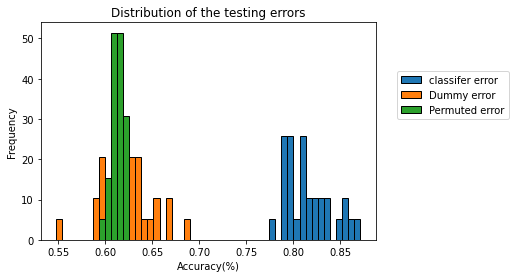

In [49]:
import matplotlib.pyplot as plt

final_errors.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy(%)")
_ = plt.title("Distribution of the testing errors")